# 이것저것 시각화
- 열심히 그려보자 읏짜

### 시각화 라이브러리

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
import platform
print(platform.system())
# 운영체제별 한글 폰트 설정
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정


# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

Windows


# 날씨 데이터와 승객 수 시각화
- 월 평균 데이터 : 기온, 강수량, 상대습도
- 일일 데이터 : 기온, 강수량, 체감온도

## 데이터 불러오기 
- 호선별역별_승하차정보(2021~2023)
- 기온, 강수량, 체감온도 

In [3]:
# 승하차정보
num_21 = pd.read_csv("data/[지하철_100]호선별역별_승하차정보_2021.csv")
num_22 = pd.read_csv("data/[지하철_100]호선별역별_승하차정보_2022.csv")
num_23 = pd.read_csv("data/[지하철_100]호선별역별_승하차정보_2023.csv")
# 기온, 강수량
wet_21 = pd.read_csv("data/[기상_102]_날짜_요일_기상조건_2021.csv")
wet_22 = pd.read_csv("data/[기상_102]_날짜_요일_기상조건_2022.csv")
wet_23 = pd.read_csv("data/[기상_102]_날짜_요일_기상조건_2023.csv")
wet_mon = pd.read_csv("raw/월평균_기온_강수량(3개년).csv")
# 체감온도
wind_21 = pd.read_csv("data/체감온도_2021.csv")
wind_22 = pd.read_csv("data/체감온도_2022.csv")
wind_23 = pd.read_csv("data/체감온도_2023.csv")
# 상대습도
hum_21 = pd.read_csv("raw/월평균상대습도_2021.csv")
hum_22 = pd.read_csv("raw/월평균상대습도_2022.csv")
hum_23 = pd.read_csv("raw/월평균상대습도_2023.csv")

## 승객수 데이터 정리 
- 일일 데이터와 월별 평균 데이터
- 공휴일도 일요일로 요일 변경

In [4]:
num_22.head(1)

,사용일자,연,월,일,요일,호선명,지하철역,승차총승객수,하차총승객수
0,2022-01-01,2022,1,1,토,1호선,서울역,18398.0,16926.0


### 공휴일 == 일 : 요일 변경하기

In [5]:
num_21.loc[num_21['사용일자'] == '2021-01-01', '요일'] = '일'
num_21.loc[num_21['사용일자'] == '2021-02-11', '요일'] = '일'
num_21.loc[num_21['사용일자'] == '2021-02-12', '요일'] = '일'
num_21.loc[num_21['사용일자'] == '2021-02-13', '요일'] = '일'
num_21.loc[num_21['사용일자'] == '2021-03-01', '요일'] = '일'
num_21.loc[num_21['사용일자'] == '2021-05-05', '요일'] = '일'
num_21.loc[num_21['사용일자'] == '2021-05-19', '요일'] = '일'
num_21.loc[num_21['사용일자'] == '2021-06-06', '요일'] = '일'
num_21.loc[num_21['사용일자'] == '2021-08-15', '요일'] = '일'
num_21.loc[num_21['사용일자'] == '2021-08-16', '요일'] = '일'
num_21.loc[num_21['사용일자'] == '2021-09-20', '요일'] = '일'
num_21.loc[num_21['사용일자'] == '2021-09-21', '요일'] = '일'
num_21.loc[num_21['사용일자'] == '2021-09-22', '요일'] = '일'
num_21.loc[num_21['사용일자'] == '2021-10-03', '요일'] = '일'
num_21.loc[num_21['사용일자'] == '2021-10-04', '요일'] = '일'
num_21.loc[num_21['사용일자'] == '2021-10-09', '요일'] = '일'
num_21.loc[num_21['사용일자'] == '2021-10-11', '요일'] = '일'
num_21.loc[num_21['사용일자'] == '2021-12-25', '요일'] = '일'

In [6]:
num_22.loc[num_22['사용일자'] == '2022-01-01', '요일'] = '일'
num_22.loc[num_22['사용일자'] == '2022-01-31', '요일'] = '일'
num_22.loc[num_22['사용일자'] == '2022-02-01', '요일'] = '일'
num_22.loc[num_22['사용일자'] == '2022-02-02', '요일'] = '일'
num_22.loc[num_22['사용일자'] == '2022-03-01', '요일'] = '일'
num_22.loc[num_22['사용일자'] == '2022-03-09', '요일'] = '일'
num_22.loc[num_22['사용일자'] == '2022-05-05', '요일'] = '일'
num_22.loc[num_22['사용일자'] == '2022-05-08', '요일'] = '일'
num_22.loc[num_22['사용일자'] == '2022-06-01', '요일'] = '일'
num_22.loc[num_22['사용일자'] == '2022-06-06', '요일'] = '일'
num_22.loc[num_22['사용일자'] == '2022-08-15', '요일'] = '일'
num_22.loc[num_22['사용일자'] == '2022-09-09', '요일'] = '일'
num_22.loc[num_22['사용일자'] == '2022-09-10', '요일'] = '일'
num_22.loc[num_22['사용일자'] == '2022-09-11', '요일'] = '일'
num_22.loc[num_22['사용일자'] == '2022-09-12', '요일'] = '일'
num_22.loc[num_22['사용일자'] == '2022-10-03', '요일'] = '일'
num_22.loc[num_22['사용일자'] == '2022-10-09', '요일'] = '일'
num_22.loc[num_22['사용일자'] == '2022-10-10', '요일'] = '일'
num_22.loc[num_22['사용일자'] == '2022-12-25', '요일'] = '일'

In [7]:
num_23.loc[num_23['사용일자'] == '2023-01-01', '요일'] = '일'
num_23.loc[num_23['사용일자'] == '2023-01-21', '요일'] = '일'
num_23.loc[num_23['사용일자'] == '2023-01-22', '요일'] = '일'
num_23.loc[num_23['사용일자'] == '2023-01-23', '요일'] = '일'
num_23.loc[num_23['사용일자'] == '2023-01-24', '요일'] = '일'
num_23.loc[num_23['사용일자'] == '2023-03-01', '요일'] = '일'
num_23.loc[num_23['사용일자'] == '2023-05-05', '요일'] = '일'
num_23.loc[num_23['사용일자'] == '2023-05-27', '요일'] = '일'
num_23.loc[num_23['사용일자'] == '2023-05-29', '요일'] = '일'
num_23.loc[num_23['사용일자'] == '2023-06-06', '요일'] = '일'
num_23.loc[num_23['사용일자'] == '2023-08-15', '요일'] = '일'
num_23.loc[num_23['사용일자'] == '2023-09-28', '요일'] = '일'
num_23.loc[num_23['사용일자'] == '2023-09-29', '요일'] = '일'
num_23.loc[num_23['사용일자'] == '2023-09-30', '요일'] = '일'
num_23.loc[num_23['사용일자'] == '2023-10-03', '요일'] = '일'
num_23.loc[num_23['사용일자'] == '2023-10-09', '요일'] = '일'
num_23.loc[num_23['사용일자'] == '2023-12-25', '요일'] = '일'

In [8]:
num_21.to_csv("data/호선별역별_승하차정보_2021_요일구분완료.csv", index=False)
num_22.to_csv("data/호선별역별_승하차정보_2022_요일구분완료.csv", index=False)
num_23.to_csv("data/호선별역별_승하차정보_2023_요일구분완료.csv", index=False)

### 날씨 데이터와 승객수 데이터 합치기 

- 기온과 강수량 : 필요 컬럼만 추출

In [9]:
wet_21_con = wet_21[['기상조건', '평균기온(℃)', '최저기온(℃)', '최고기온(℃)', '강수량(mm)']]
wet_22_con = wet_22[['기상조건', '평균기온(℃)', '최저기온(℃)', '최고기온(℃)', '강수량(mm)']]
wet_23_con = wet_23[['기상조건', '평균기온(℃)', '최저기온(℃)', '최고기온(℃)', '강수량(mm)']]

In [10]:
wet_21_con.tail()

,기상조건,평균기온(℃),최저기온(℃),최고기온(℃),강수량(mm)
360,폭염/한파,-7.6,-12.9,-3.9,0.0
361,맑음,-4.1,-8.5,-0.9,0.0
362,약한눈비,0.4,-3.8,5.9,0.2
363,맑음,-3.9,-6.8,0.2,0.0
364,맑음,-6.7,-8.8,-3.9,0.0


- 체감온도 : 필요 컬럼 추출

In [11]:
wind_21_con = wind_21[['체감온도(°C)']]
wind_22_con = wind_22[['체감온도(°C)']]
wind_23_con = wind_23[['체감온도(°C)']]

- ~데이터프레임 합치기~
- 나중에 아래 '날씨 데이터와의 관련성 찾기'에서 다시 합칠 것임(이건 잘못한건)

In [12]:
df_21 = pd.concat([num_21, wet_21_con, wind_21_con], axis=1)
df_22 = pd.concat([num_22, wet_22_con, wind_22_con], axis=1)
df_23 = pd.concat([num_23, wet_23_con, wind_23_con], axis=1)

In [13]:
wet_21.tail()

,연,월,일,요일,기상조건,평균기온(℃),최저기온(℃),최고기온(℃),강수량(mm)
360,2021,12,27,월,폭염/한파,-7.6,-12.9,-3.9,0.0
361,2021,12,28,화,맑음,-4.1,-8.5,-0.9,0.0
362,2021,12,29,수,약한눈비,0.4,-3.8,5.9,0.2
363,2021,12,30,목,맑음,-3.9,-6.8,0.2,0.0
364,2021,12,31,금,맑음,-6.7,-8.8,-3.9,0.0


In [14]:
df_21.tail(10)

,사용일자,연,월,일,요일,호선명,지하철역,승차총승객수,하차총승객수,기상조건,평균기온(℃),최저기온(℃),최고기온(℃),강수량(mm),체감온도(°C)
116271,2021-12-31,2021,12,31,금,9호선2~3단계,봉은사,13774.0,13893.0,NaN,NaN,NaN,NaN,NaN,NaN
116272,2021-12-31,2021,12,31,금,9호선2~3단계,종합운동장,3584.0,3548.0,NaN,NaN,NaN,NaN,NaN,NaN
116273,2021-12-31,2021,12,31,금,9호선2~3단계,삼전,6300.0,5821.0,NaN,NaN,NaN,NaN,NaN,NaN
116274,2021-12-31,2021,12,31,금,9호선2~3단계,석촌고분,5534.0,5349.0,NaN,NaN,NaN,NaN,NaN,NaN
116275,2021-12-31,2021,12,31,금,9호선2~3단계,석촌,7414.0,6447.0,NaN,NaN,NaN,NaN,NaN,NaN
116276,2021-12-31,2021,12,31,금,9호선2~3단계,송파나루,5099.0,5268.0,NaN,NaN,NaN,NaN,NaN,NaN
116277,2021-12-31,2021,12,31,금,9호선2~3단계,한성백제,2099.0,1841.0,NaN,NaN,NaN,NaN,NaN,NaN
116278,2021-12-31,2021,12,31,금,9호선2~3단계,올림픽공원(한국체대),7233.0,7385.0,NaN,NaN,NaN,NaN,NaN,NaN
116279,2021-12-31,2021,12,31,금,9호선2~3단계,둔촌오륜,734.0,778.0,NaN,NaN,NaN,NaN,NaN,NaN
116280,2021-12-31,2021,12,31,금,9호선2~3단계,중앙보훈병원,7979.0,7096.0,NaN,NaN,NaN,NaN,NaN,NaN


- '호선명' 컬럼에서 9호선2~3단계 도 9호선으로 value값 변경

In [15]:
df_21.loc[df_21['호선명'] == '9호선2~3단계', '호선명'] = '9호선'
df_22.loc[df_22['호선명'] == '9호선2~3단계', '호선명'] = '9호선'
df_23.loc[df_23['호선명'] == '9호선2~3단계', '호선명'] = '9호선'

### 각 호선 별 승차 총 승객수와 하차 총 승객수
- 2023년 데이터는 1년 치 데이터가 아니어서 총 수는 적음

- 총합 비교

In [16]:
df_21_sum = df_21.groupby(['호선명'])['승차총승객수'].mean()
df_22_sum = df_22.groupby(['호선명'])['승차총승객수'].mean()
df_23_sum = df_23.groupby(['호선명'])['승차총승객수'].mean()
df_21_sum_ = df_21.groupby(['호선명'])['하차총승객수'].mean()
df_22_sum_ = df_22.groupby(['호선명'])['하차총승객수'].mean()
df_23_sum_ = df_23.groupby(['호선명'])['하차총승객수'].mean()

In [17]:
print('< 2021년 각 호선 별 승차 총 승객수 >')
print(df_21.groupby(['호선명'])['승차총승객수'].sum())
print('\n')
print('< 2021년 각 호선 별 승차 총 승객수 >')
print(df_21.groupby(['호선명'])['하차총승객수'].sum())
print('=' * 30)
print('< 2022년 각 호선 별 승차 총 승객수 >')
print(df_22.groupby(['호선명'])['승차총승객수'].sum())
print('\n')
print('< 2022년 각 호선 별 승차 총 승객수 >')
print(df_22.groupby(['호선명'])['하차총승객수'].sum())
print('=' * 30)
print('< 2023년 각 호선 별 승차 총 승객수 >')
print(df_23.groupby(['호선명'])['승차총승객수'].sum())
print('\n')
print('< 2023년 각 호선 별 승차 총 승객수 >')
print(df_21.groupby(['호선명'])['하차총승객수'].sum())

< 2021년 각 호선 별 승차 총 승객수 >
호선명
1호선     64863991.0
2호선    391591285.0
3호선    149233080.0
4호선    140561197.0
5호선    184088255.0
6호선     95528836.0
7호선    202548647.0
8호선     54519873.0
9호선    106172696.0
Name: 승차총승객수, dtype: float64


< 2021년 각 호선 별 승차 총 승객수 >
호선명
1호선     63278833.0
2호선    395478446.0
3호선    148941891.0
4호선    141646554.0
5호선    183218785.0
6호선     93987813.0
7호선    199737066.0
8호선     54964819.0
9호선    107073699.0
Name: 하차총승객수, dtype: float64
< 2022년 각 호선 별 승차 총 승객수 >
호선명
1호선     74538614.0
2호선    441861854.0
3호선    167786748.0
4호선    158029620.0
5호선    206065776.0
6호선    108027486.0
7호선    191420784.0
8호선     60647370.0
9호선    121547907.0
Name: 승차총승객수, dtype: float64


< 2022년 각 호선 별 승차 총 승객수 >
호선명
1호선     72891546.0
2호선    447823921.0
3호선    167588713.0
4호선    160093030.0
5호선    204965294.0
6호선    106623231.0
7호선    188305212.0
8호선     61098112.0
9호선    122108866.0
Name: 하차총승객수, dtype: float64
< 2023년 각 호선 별 승차 총 승객수 >
호선명
1호선     53805729.0
2호선    308227122.0
3호선    1

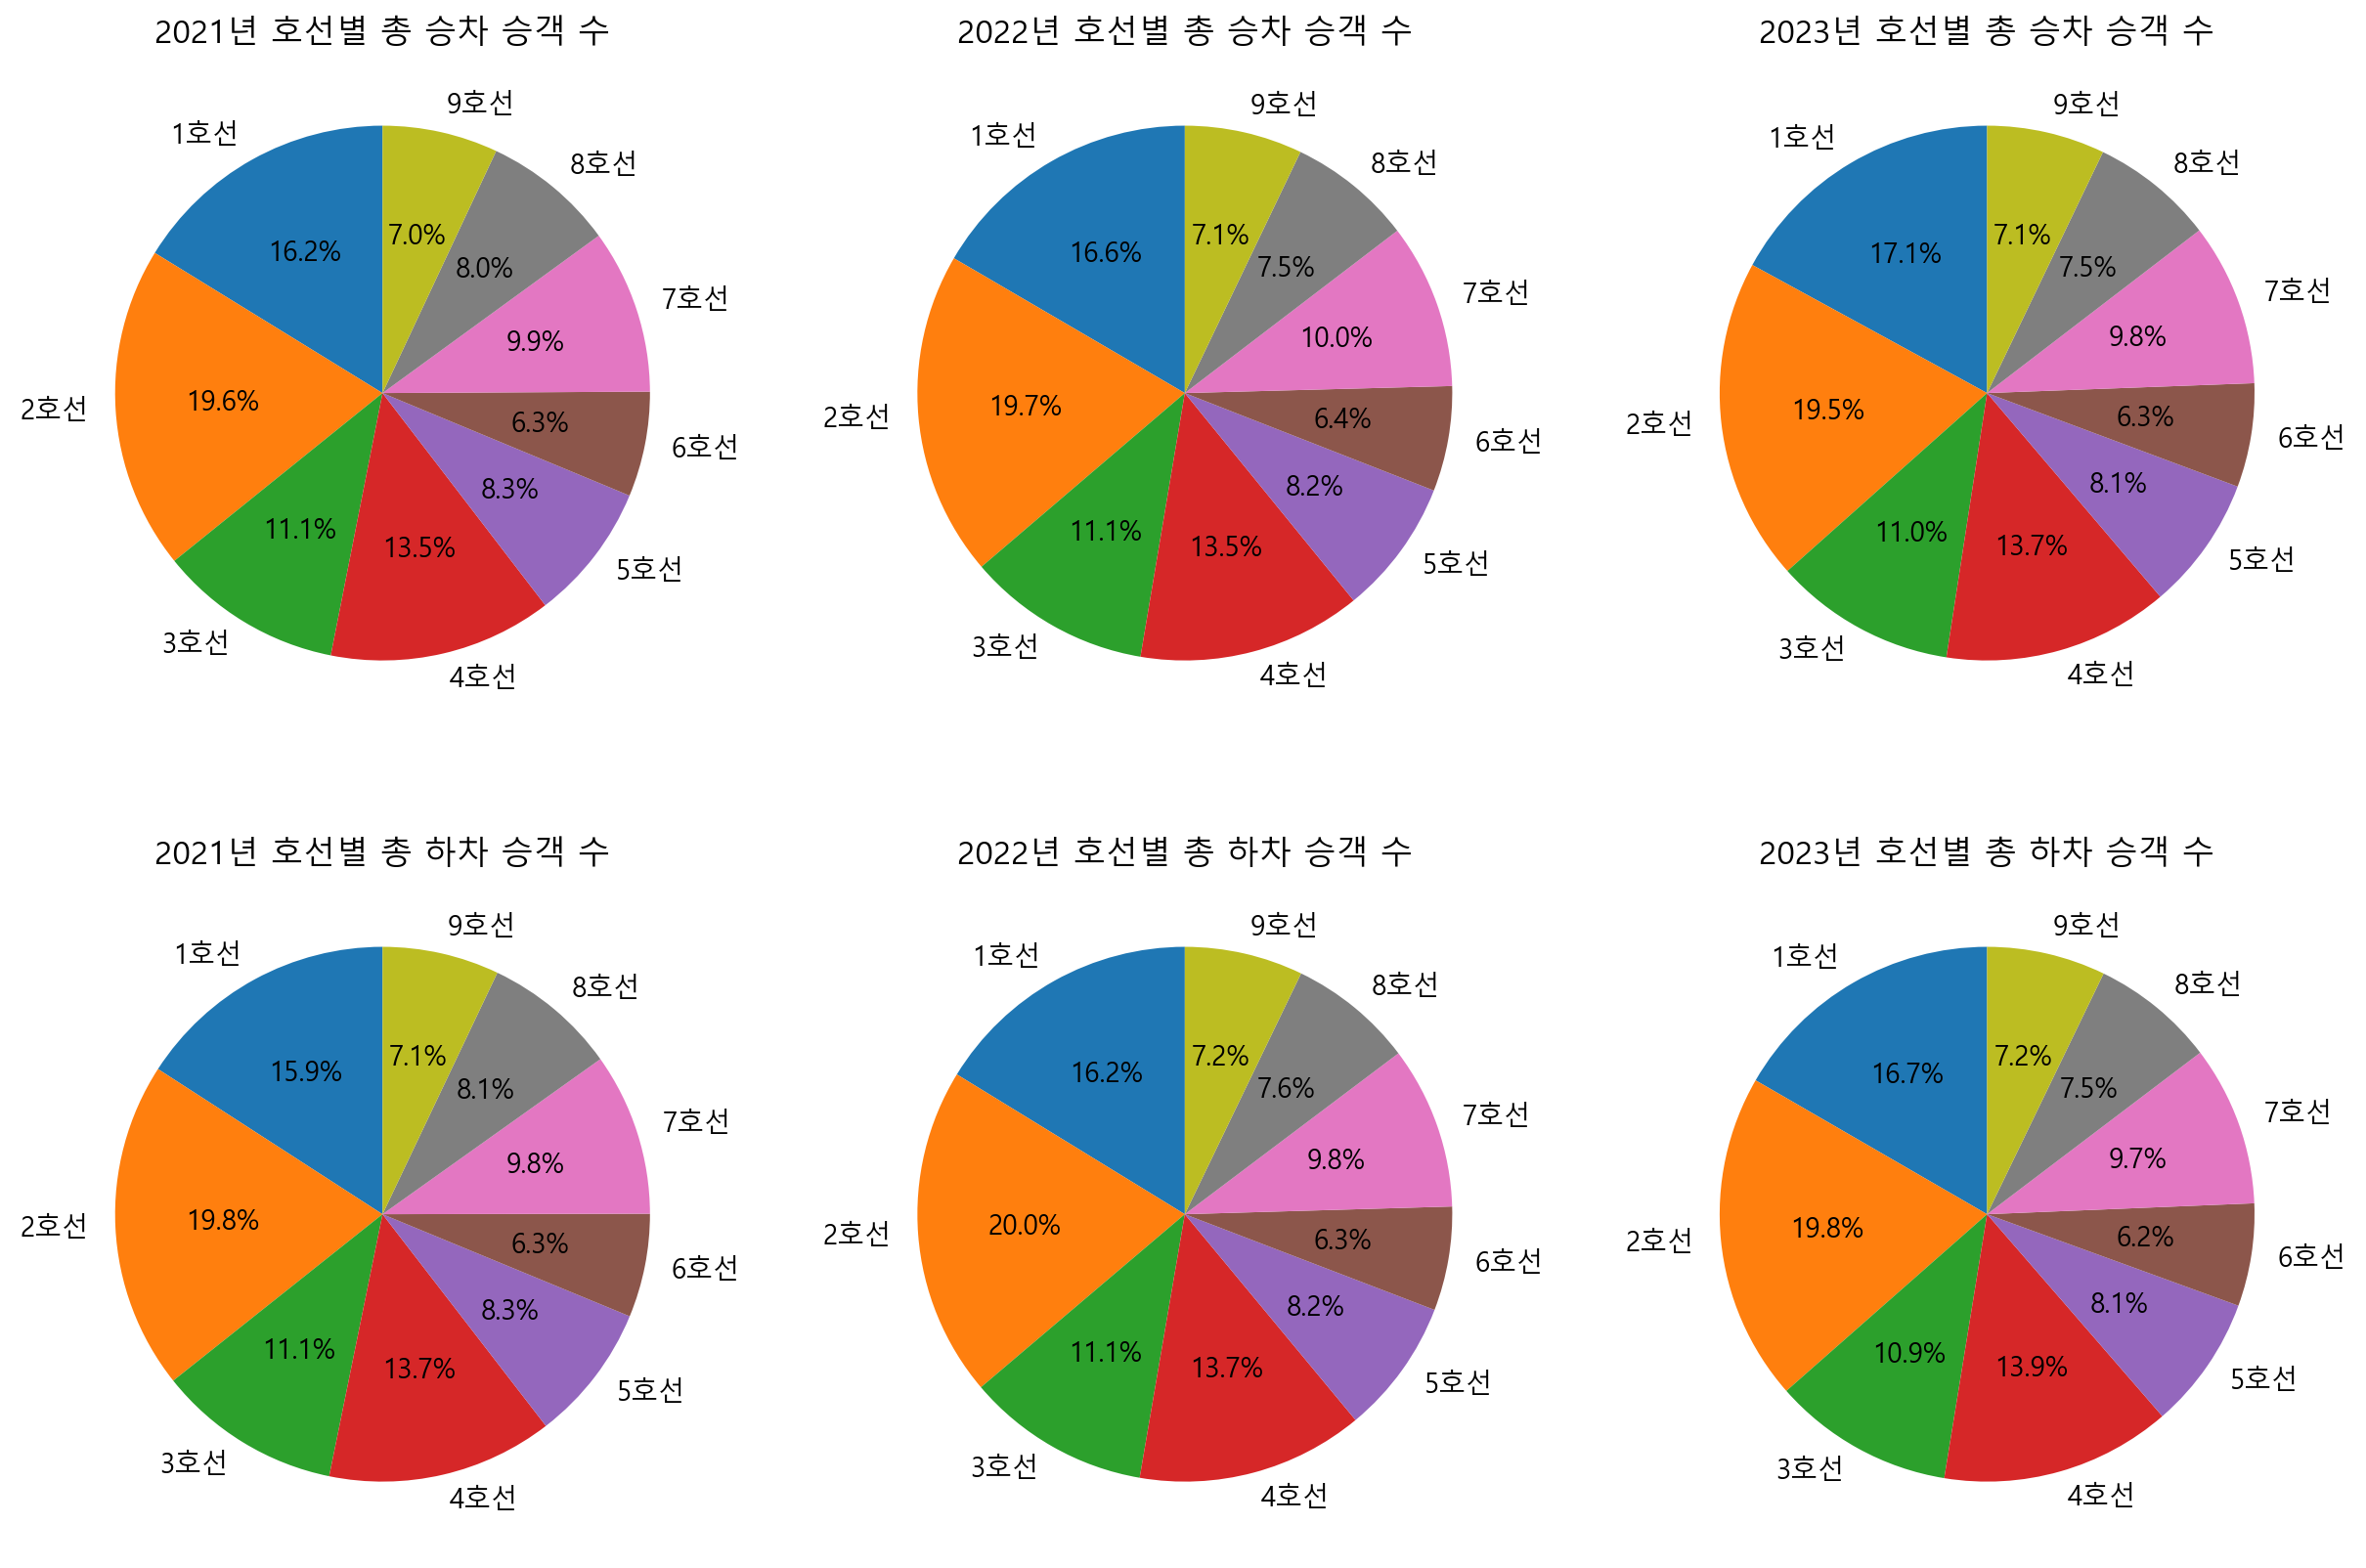

In [18]:
figure, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (15, 10))

start_angle =90

df_21_sum.plot(kind = 'pie',
               ax = ax[0, 0],
               autopct = '%.1f%%',
              startangle=start_angle)
ax[0, 0].set_title('2021년 호선별 총 승차 승객 수')
ax[0, 0].set_ylabel('')

df_21_sum_.plot(kind = 'pie',
               ax = ax[1, 0],
               autopct = '%.1f%%',
              startangle=start_angle)
ax[1, 0].set_title('2021년 호선별 총 하차 승객 수')
ax[1, 0].set_ylabel('')

df_22_sum.plot(kind = 'pie',
               ax = ax[0, 1],
               autopct = '%.1f%%',
              startangle=start_angle)
ax[0, 1].set_title('2022년 호선별 총 승차 승객 수')
ax[0, 1].set_ylabel('')

df_22_sum_.plot(kind = 'pie',
               ax = ax[1, 1],
               autopct = '%.1f%%',
              startangle=start_angle)
ax[1, 1].set_title('2022년 호선별 총 하차 승객 수')
ax[1, 1].set_ylabel('')

df_23_sum.plot(kind = 'pie',
               ax = ax[0, 2],
               autopct = '%.1f%%',
              startangle=start_angle)
ax[0, 2].set_title('2023년 호선별 총 승차 승객 수')
ax[0, 2].set_ylabel('')

df_23_sum_.plot(kind = 'pie',
               ax = ax[1, 2],
               autopct = '%.1f%%',
              startangle=start_angle)
ax[1, 2].set_title('2023년 호선별 총 하차 승객 수')
ax[1, 2].set_ylabel('')


plt.show()

- 승차승객수 - 하차승객수

In [19]:
diff_21 = pd.DataFrame(df_21['승차총승객수'] - df_21['하차총승객수'], columns = ['2021년']) 
diff_22 = pd.DataFrame(df_22['승차총승객수'] - df_22['하차총승객수'], columns = ['2022년']) 
diff_23 = pd.DataFrame(df_23['승차총승객수'] - df_23['하차총승객수'], columns = ['2023년']) 
diff = pd.concat([diff_21, diff_22, diff_23], axis=1)
diff['호선명'] = df_21['호선명']
diff

,2021년,2022년,2023년,호선명
0,-598.0,1472.0,4993.0,1호선
1,-338.0,-126.0,1029.0,1호선
2,252.0,598.0,2225.0,1호선
3,701.0,1113.0,2098.0,1호선
4,592.0,1387.0,853.0,1호선
...,...,...,...,...
116276,-169.0,NaN,NaN,9호선
116277,258.0,NaN,NaN,9호선
116278,-152.0,NaN,NaN,9호선
116279,-44.0,NaN,NaN,9호선


- 평균값 비교

In [20]:
print('< 2021년 각 호선 별 평균 승차 총 승객수 >')
print(df_21.groupby(['호선명'])['승차총승객수'].mean())
print('\n')
print('< 2021년 각 호선 별 평균 승차 총 승객수 >')
print(df_21.groupby(['호선명'])['하차총승객수'].mean())
print('=' * 30)
print('< 2022년 각 호선 별 평균 승차 총 승객수 >')
print(df_22.groupby(['호선명'])['승차총승객수'].mean())
print('\n')
print('< 2022년 각 호선 별 평균 승차 총 승객수 >')
print(df_22.groupby(['호선명'])['하차총승객수'].mean())
print('=' * 30)
print('< 2023년 각 호선 별 평균 승차 총 승객수 >')
print(df_23.groupby(['호선명'])['승차총승객수'].mean())
print('\n')
print('< 2023년 각 호선 별 평균 승차 총 승객수 >')
print(df_21.groupby(['호선명'])['하차총승객수'].mean())
df_21_mean = df_21.groupby(['호선명'])['승차총승객수'].mean()
df_22_mean = df_22.groupby(['호선명'])['승차총승객수'].mean()
df_23_mean = df_23.groupby(['호선명'])['승차총승객수'].mean()
df_21_mean_ = df_21.groupby(['호선명'])['하차총승객수'].mean()
df_22_mean_ = df_22.groupby(['호선명'])['하차총승객수'].mean()
df_23_mean_ = df_23.groupby(['호선명'])['하차총승객수'].mean()

< 2021년 각 호선 별 평균 승차 총 승객수 >
호선명
1호선    17770.956438
2호선    21457.056712
3호선    12161.444055
4호선    14811.506533
5호선     9120.052267
6호선     6957.165247
7호선    10880.937255
8호선     8766.662325
9호선     7654.844701
Name: 승차총승객수, dtype: float64


< 2021년 각 호선 별 평균 승차 총 승객수 >
호선명
1호선    17336.666575
2호선    21670.051836
3호선    12137.714204
4호선    14925.875026
5호선     9076.977211
6호선     6844.935766
7호선    10729.898791
8호선     8838.208554
9호선     7719.805263
Name: 하차총승객수, dtype: float64
< 2022년 각 호선 별 평균 승차 총 승객수 >
호선명
1호선    20421.538082
2호선    24211.608438
3호선    13657.854945
4호선    16652.225501
5호선    10081.495890
6호선     7828.078696
7호선    12266.631464
8호선     9230.954338
9호선     8763.367484
Name: 승차총승객수, dtype: float64


< 2022년 각 호선 별 평균 승차 총 승객수 >
호선명
1호선    19970.286575
2호선    24538.297041
3호선    13641.734880
4호선    16869.655427
5호선    10027.656262
6호선     7726.321087
7호선    12066.979302
8호선     9299.560426
9호선     8803.811536
Name: 하차총승객수, dtype: float64
< 2023년 각 호선 별 평균 승차 총 승객수 >

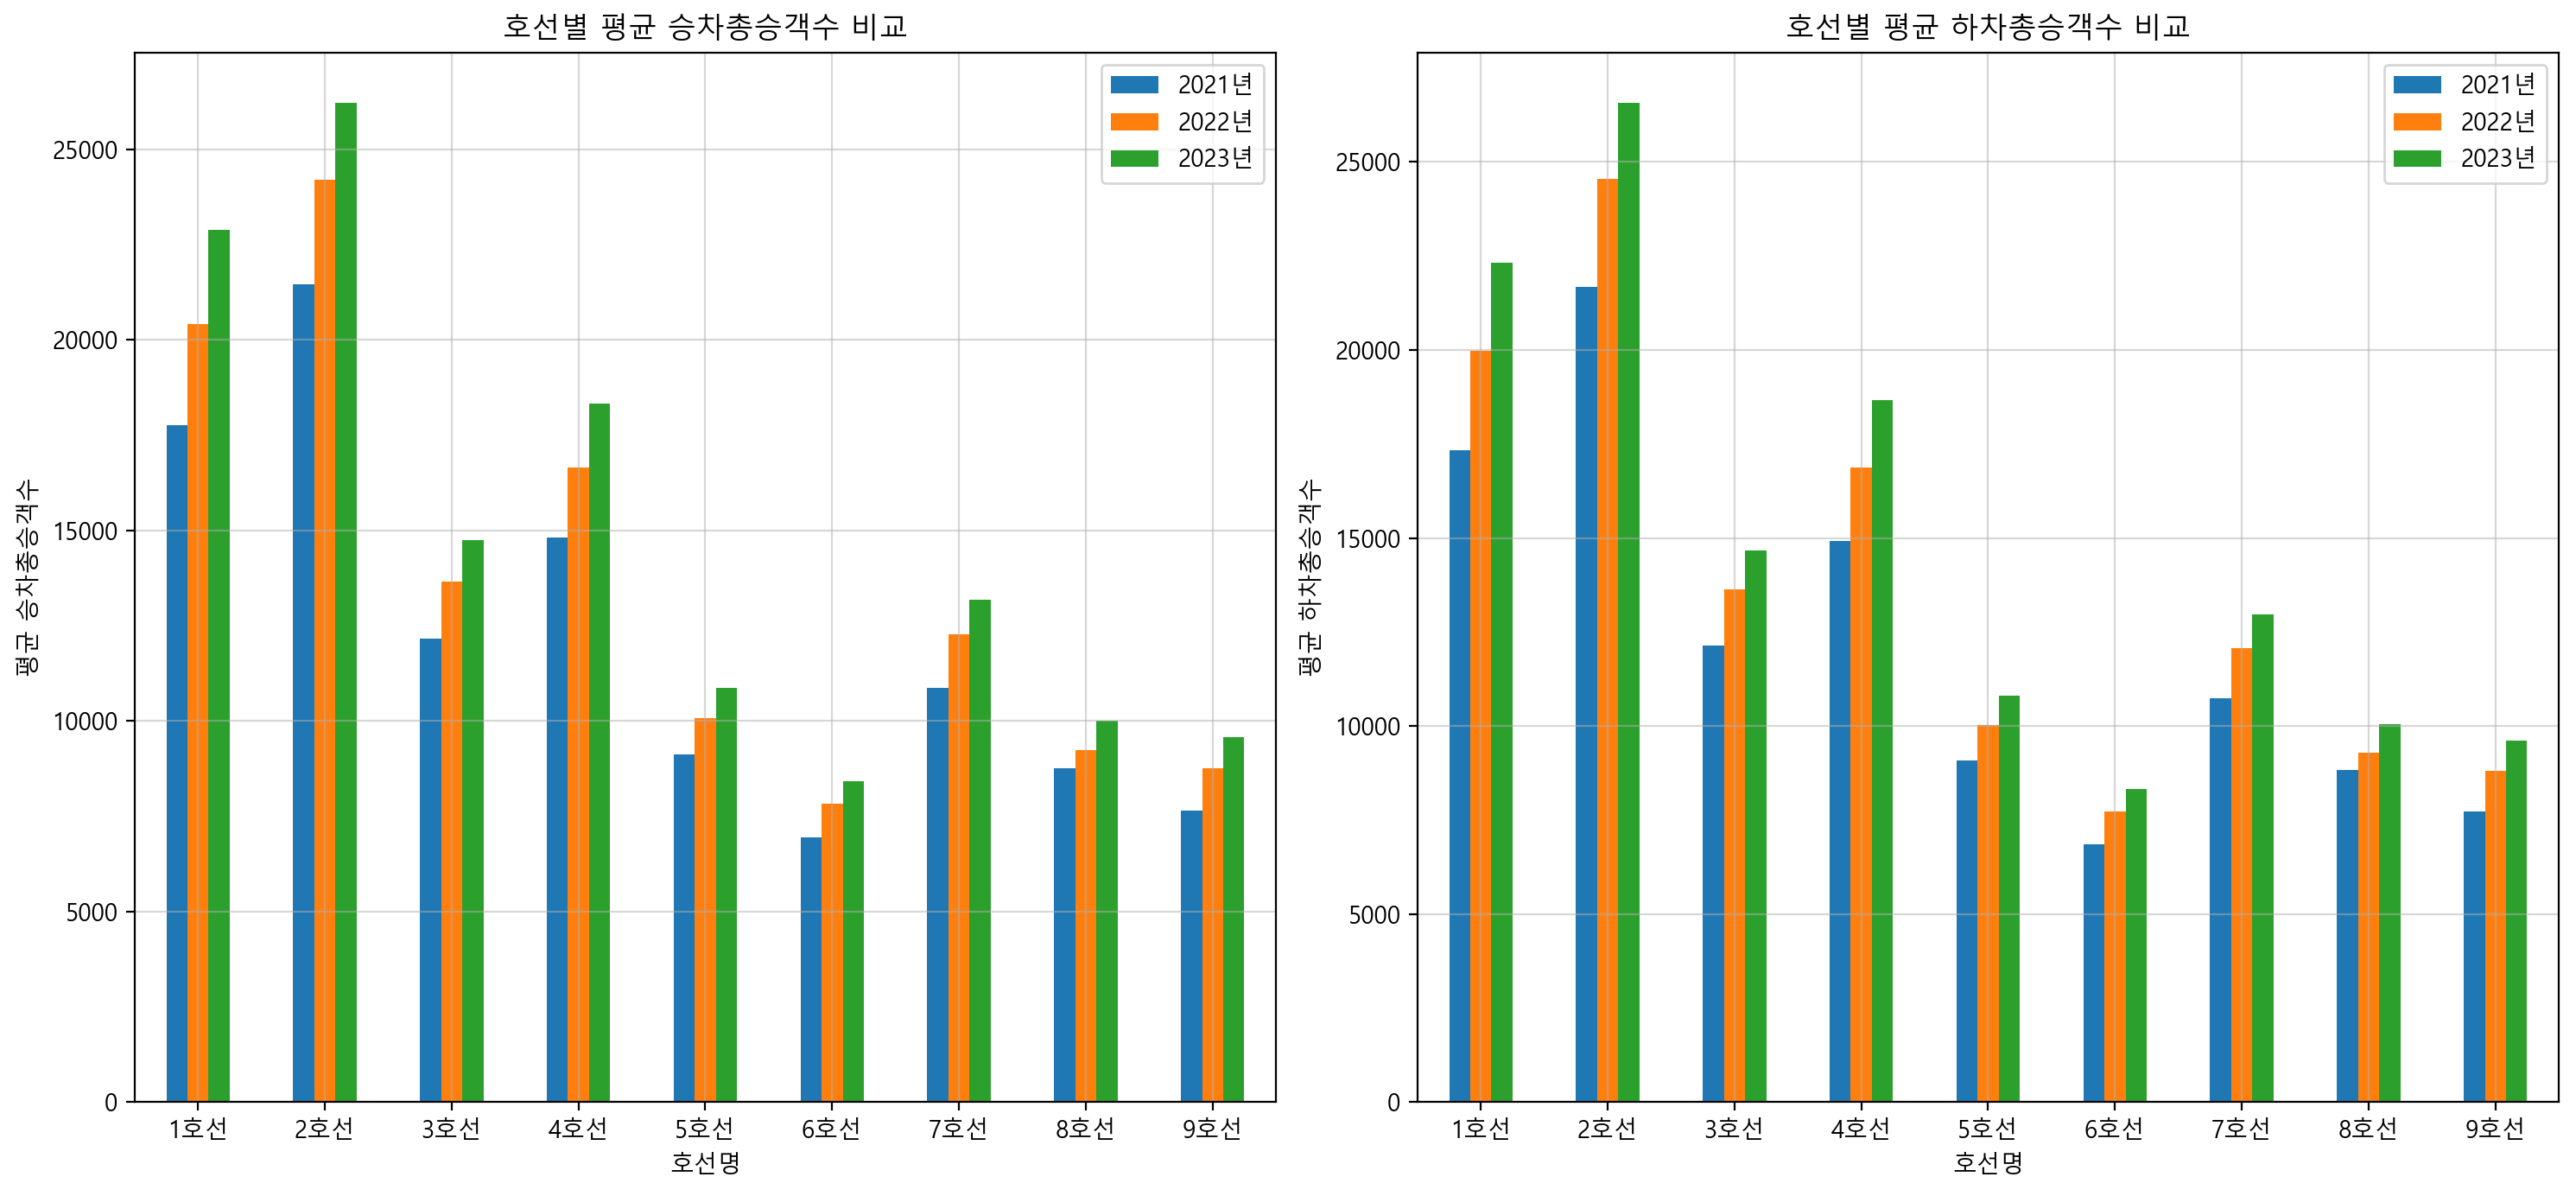

In [21]:
result_1 = pd.concat([df_21_mean, df_22_mean, df_23_mean], axis=1)
result_1.columns = ['2021년', '2022년', '2023년']
result_2 = pd.concat([df_21_mean_, df_22_mean_, df_23_mean_], axis=1)
result_2.columns = ['2021년', '2022년', '2023년']

fig, ax = plt.subplots(1, 2, figsize=(15, 7))
# 그래프 그리기
result_1.plot(kind='bar', ax=ax[0], title='호선별 평균 승차총승객수 비교', legend=True)
ax[0].grid(alpha=0.5)
ax[0].set_xlabel('호선명')
ax[0].set_ylabel('평균 승차총승객수')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=0, ha='center') 

result_2.plot(kind='bar', ax=ax[1], title='호선별 평균 하차총승객수 비교', legend=True)
ax[1].grid(alpha=0.5)
ax[1].set_xlabel('호선명')
ax[1].set_ylabel('평균 하차총승객수')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=0, ha='center') 

plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


- 평균 차이(승차 - 하차)

In [22]:
df_21_mean = df_21.groupby(['호선명'])['승차총승객수'].mean()
df_22_mean = df_22.groupby(['호선명'])['승차총승객수'].mean()
df_23_mean = df_23.groupby(['호선명'])['승차총승객수'].mean()
df_21_mean_ = df_21.groupby(['호선명'])['하차총승객수'].mean()
df_22_mean_ = df_22.groupby(['호선명'])['하차총승객수'].mean()
df_23_mean_ = df_23.groupby(['호선명'])['하차총승객수'].mean()

In [23]:
diff_1_mean = pd.DataFrame(df_21_mean - df_21_mean_, columns = ['2021년']) 
diff_2_mean = pd.DataFrame(df_22_mean - df_22_mean_, columns = ['2022년']) 
diff_3_mean = pd.DataFrame(df_23_mean - df_23_mean_, columns = ['2023년'])
Diff = pd.concat([diff_1_mean, diff_2_mean, diff_3_mean],  axis = 1)
Diff

,2021년,2022년,2023년
호선명,,,
1호선,434.289863,451.251507,582.915319
2호선,-212.995123,-326.688603,-346.792255
3호선,23.729851,16.120065,79.210394
4호선,-114.368493,-217.429926,-338.468412
5호선,43.075056,53.839628,53.255091
6호선,112.229481,101.757609,110.537465
7호선,151.038464,199.652163,228.401861
8호선,-71.546229,-68.606088,-38.509929
9호선,-64.960562,-40.444052,-35.179059


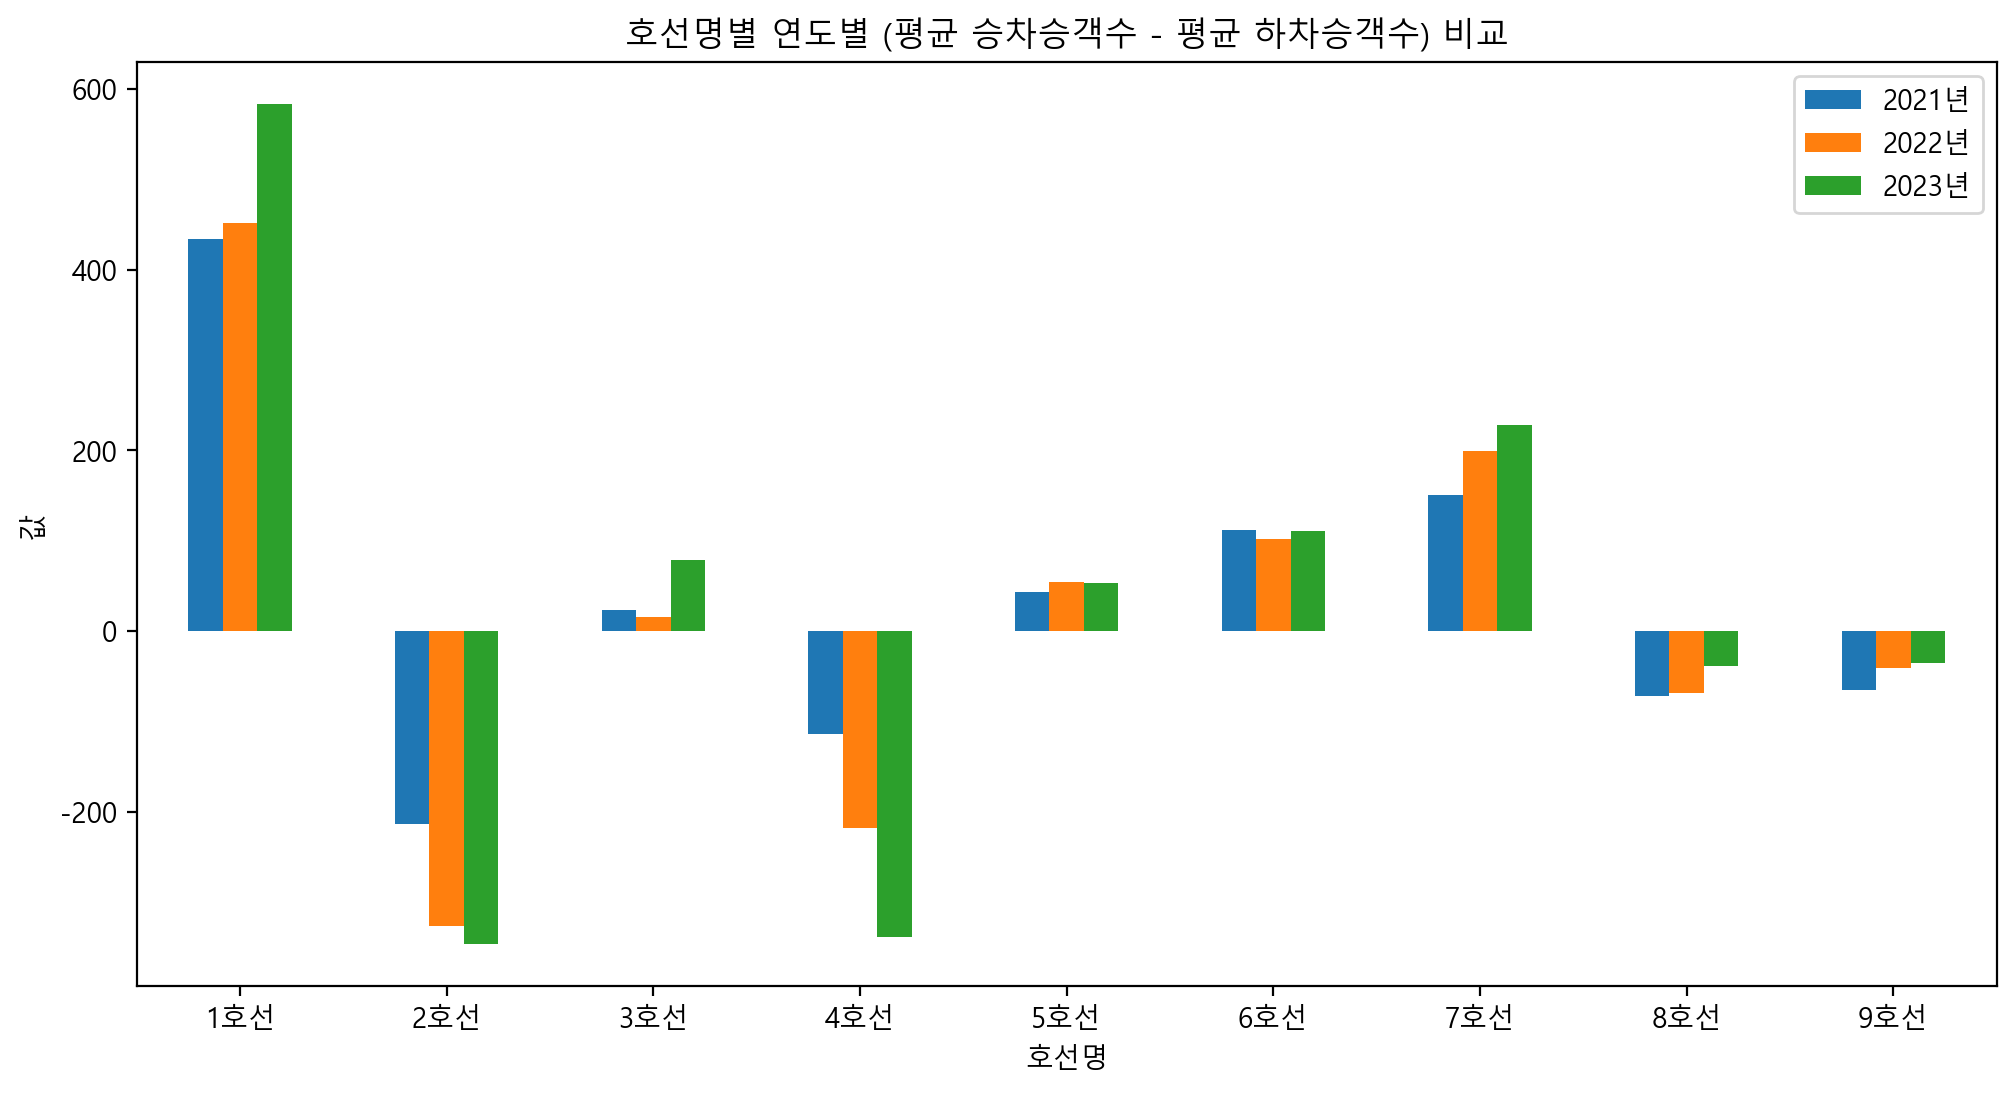

In [24]:
ax = Diff.plot(kind='bar', figsize=(12, 6))
plt.xlabel('호선명')
plt.ylabel('값')
plt.title('호선명별 연도별 (평균 승차승객수 - 평균 하차승객수) 비교')
ax.set_xticklabels(Diff.index, rotation=0, ha='center')
plt.show()

# 날씨 데이터와의 관련성 찾기

## 승차 이용객수 상위 5개역과 날씨 데이터와의 관련성
- 5개역: 강남(2호선), 잠실(2호선), 홍대입구(2호선), 신림(1호선), 삼성(2호선)
- 근거: (나윤님분석) https://github.com/mizima1015/multi_semi_project/blob/main/EDA/data_preprocessing(%E1%84%89%E1%85%B3%E1%86%BC%E1%84%92%E1%85%A1%E1%84%8E%E1%85%A1_%E1%84%8B%E1%85%B5%E1%86%AB%E1%84%8B%E1%85%AF%E1%86%AB_%E1%84%8C%E1%85%A5%E1%86%BC%E1%84%87%E1%85%A9).ipynb

### 강남(2호선)

In [48]:
# 강남역 데이터 추출
gn2 = num_22[(num_22['호선명'] == '2호선') & (num_22['지하철역'] == '강남')].reset_index()
gn2.drop(columns = 'index', axis=1, inplace = True)
gn2

,사용일자,연,월,일,요일,호선명,지하철역,승차총승객수,하차총승객수
0,2022-01-01,2022,1,1,일,2호선,강남,26200.0,24977.0
1,2022-01-02,2022,1,2,일,2호선,강남,28851.0,27608.0
2,2022-01-03,2022,1,3,월,2호선,강남,82703.0,79988.0
3,2022-01-04,2022,1,4,화,2호선,강남,85529.0,82798.0
4,2022-01-05,2022,1,5,수,2호선,강남,85391.0,82379.0
...,...,...,...,...,...,...,...,...,...
360,2022-12-27,2022,12,27,화,2호선,강남,88608.0,85511.0
361,2022-12-28,2022,12,28,수,2호선,강남,88892.0,85526.0
362,2022-12-29,2022,12,29,목,2호선,강남,86670.0,84321.0
363,2022-12-30,2022,12,30,금,2호선,강남,83723.0,83171.0


- 날씨 데이터와 합치기

In [49]:
gn_2 = pd.concat([gn2, wet_22_con], axis = 1)
gn_2

,사용일자,연,월,일,요일,호선명,지하철역,승차총승객수,하차총승객수,기상조건,평균기온(℃),최저기온(℃),최고기온(℃),강수량(mm)
0,2022-01-01,2022,1,1,일,2호선,강남,26200.0,24977.0,맑음,-4.3,-10.2,2.3,0.0
1,2022-01-02,2022,1,2,일,2호선,강남,28851.0,27608.0,약한눈비,-1.3,-5.2,3.0,0.3
2,2022-01-03,2022,1,3,월,2호선,강남,82703.0,79988.0,맑음,-1.9,-8.0,2.5,0.0
3,2022-01-04,2022,1,4,화,2호선,강남,85529.0,82798.0,맑음,-2.5,-5.6,1.0,0.0
4,2022-01-05,2022,1,5,수,2호선,강남,85391.0,82379.0,맑음,-2.8,-7.8,1.9,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2022-12-27,2022,12,27,화,2호선,강남,88608.0,85511.0,맑음,-2.6,-7.3,3.3,0.0
361,2022-12-28,2022,12,28,수,2호선,강남,88892.0,85526.0,약한눈비,-3.3,-6.0,0.1,0.1
362,2022-12-29,2022,12,29,목,2호선,강남,86670.0,84321.0,맑음,-2.9,-7.8,2.1,0.0
363,2022-12-30,2022,12,30,금,2호선,강남,83723.0,83171.0,맑음,-1.8,-4.4,2.3,0.0


- 승차총승객수-하차총승객수 컬럼 추가

In [50]:
gn_2['승객수차이'] = gn_2['승차총승객수'] - gn_2['하차총승객수']
gn_2

,사용일자,연,월,일,요일,호선명,지하철역,승차총승객수,하차총승객수,기상조건,평균기온(℃),최저기온(℃),최고기온(℃),강수량(mm),승객수차이
0,2022-01-01,2022,1,1,일,2호선,강남,26200.0,24977.0,맑음,-4.3,-10.2,2.3,0.0,1223.0
1,2022-01-02,2022,1,2,일,2호선,강남,28851.0,27608.0,약한눈비,-1.3,-5.2,3.0,0.3,1243.0
2,2022-01-03,2022,1,3,월,2호선,강남,82703.0,79988.0,맑음,-1.9,-8.0,2.5,0.0,2715.0
3,2022-01-04,2022,1,4,화,2호선,강남,85529.0,82798.0,맑음,-2.5,-5.6,1.0,0.0,2731.0
4,2022-01-05,2022,1,5,수,2호선,강남,85391.0,82379.0,맑음,-2.8,-7.8,1.9,0.0,3012.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2022-12-27,2022,12,27,화,2호선,강남,88608.0,85511.0,맑음,-2.6,-7.3,3.3,0.0,3097.0
361,2022-12-28,2022,12,28,수,2호선,강남,88892.0,85526.0,약한눈비,-3.3,-6.0,0.1,0.1,3366.0
362,2022-12-29,2022,12,29,목,2호선,강남,86670.0,84321.0,맑음,-2.9,-7.8,2.1,0.0,2349.0
363,2022-12-30,2022,12,30,금,2호선,강남,83723.0,83171.0,맑음,-1.8,-4.4,2.3,0.0,552.0


In [51]:
# 컬럼 재정렬
gn_2 = gn_2[['사용일자', '연', '월', '일', '요일', '호선명', '지하철역', '기상조건', '승차총승객수', '하차총승객수', '평균기온(℃)', '최저기온(℃)', '최고기온(℃)', '강수량(mm)', '승객수차이']]
gn_2.head(1)

,사용일자,연,월,일,요일,호선명,지하철역,기상조건,승차총승객수,하차총승객수,평균기온(℃),최저기온(℃),최고기온(℃),강수량(mm),승객수차이
0,2022-01-01,2022,1,1,일,2호선,강남,맑음,26200.0,24977.0,-4.3,-10.2,2.3,0.0,1223.0


#### 승객수 차이와 다른 변수와의 관련성
- 뚜렷한 양/음의 상관관계가 보이진 않는듯?

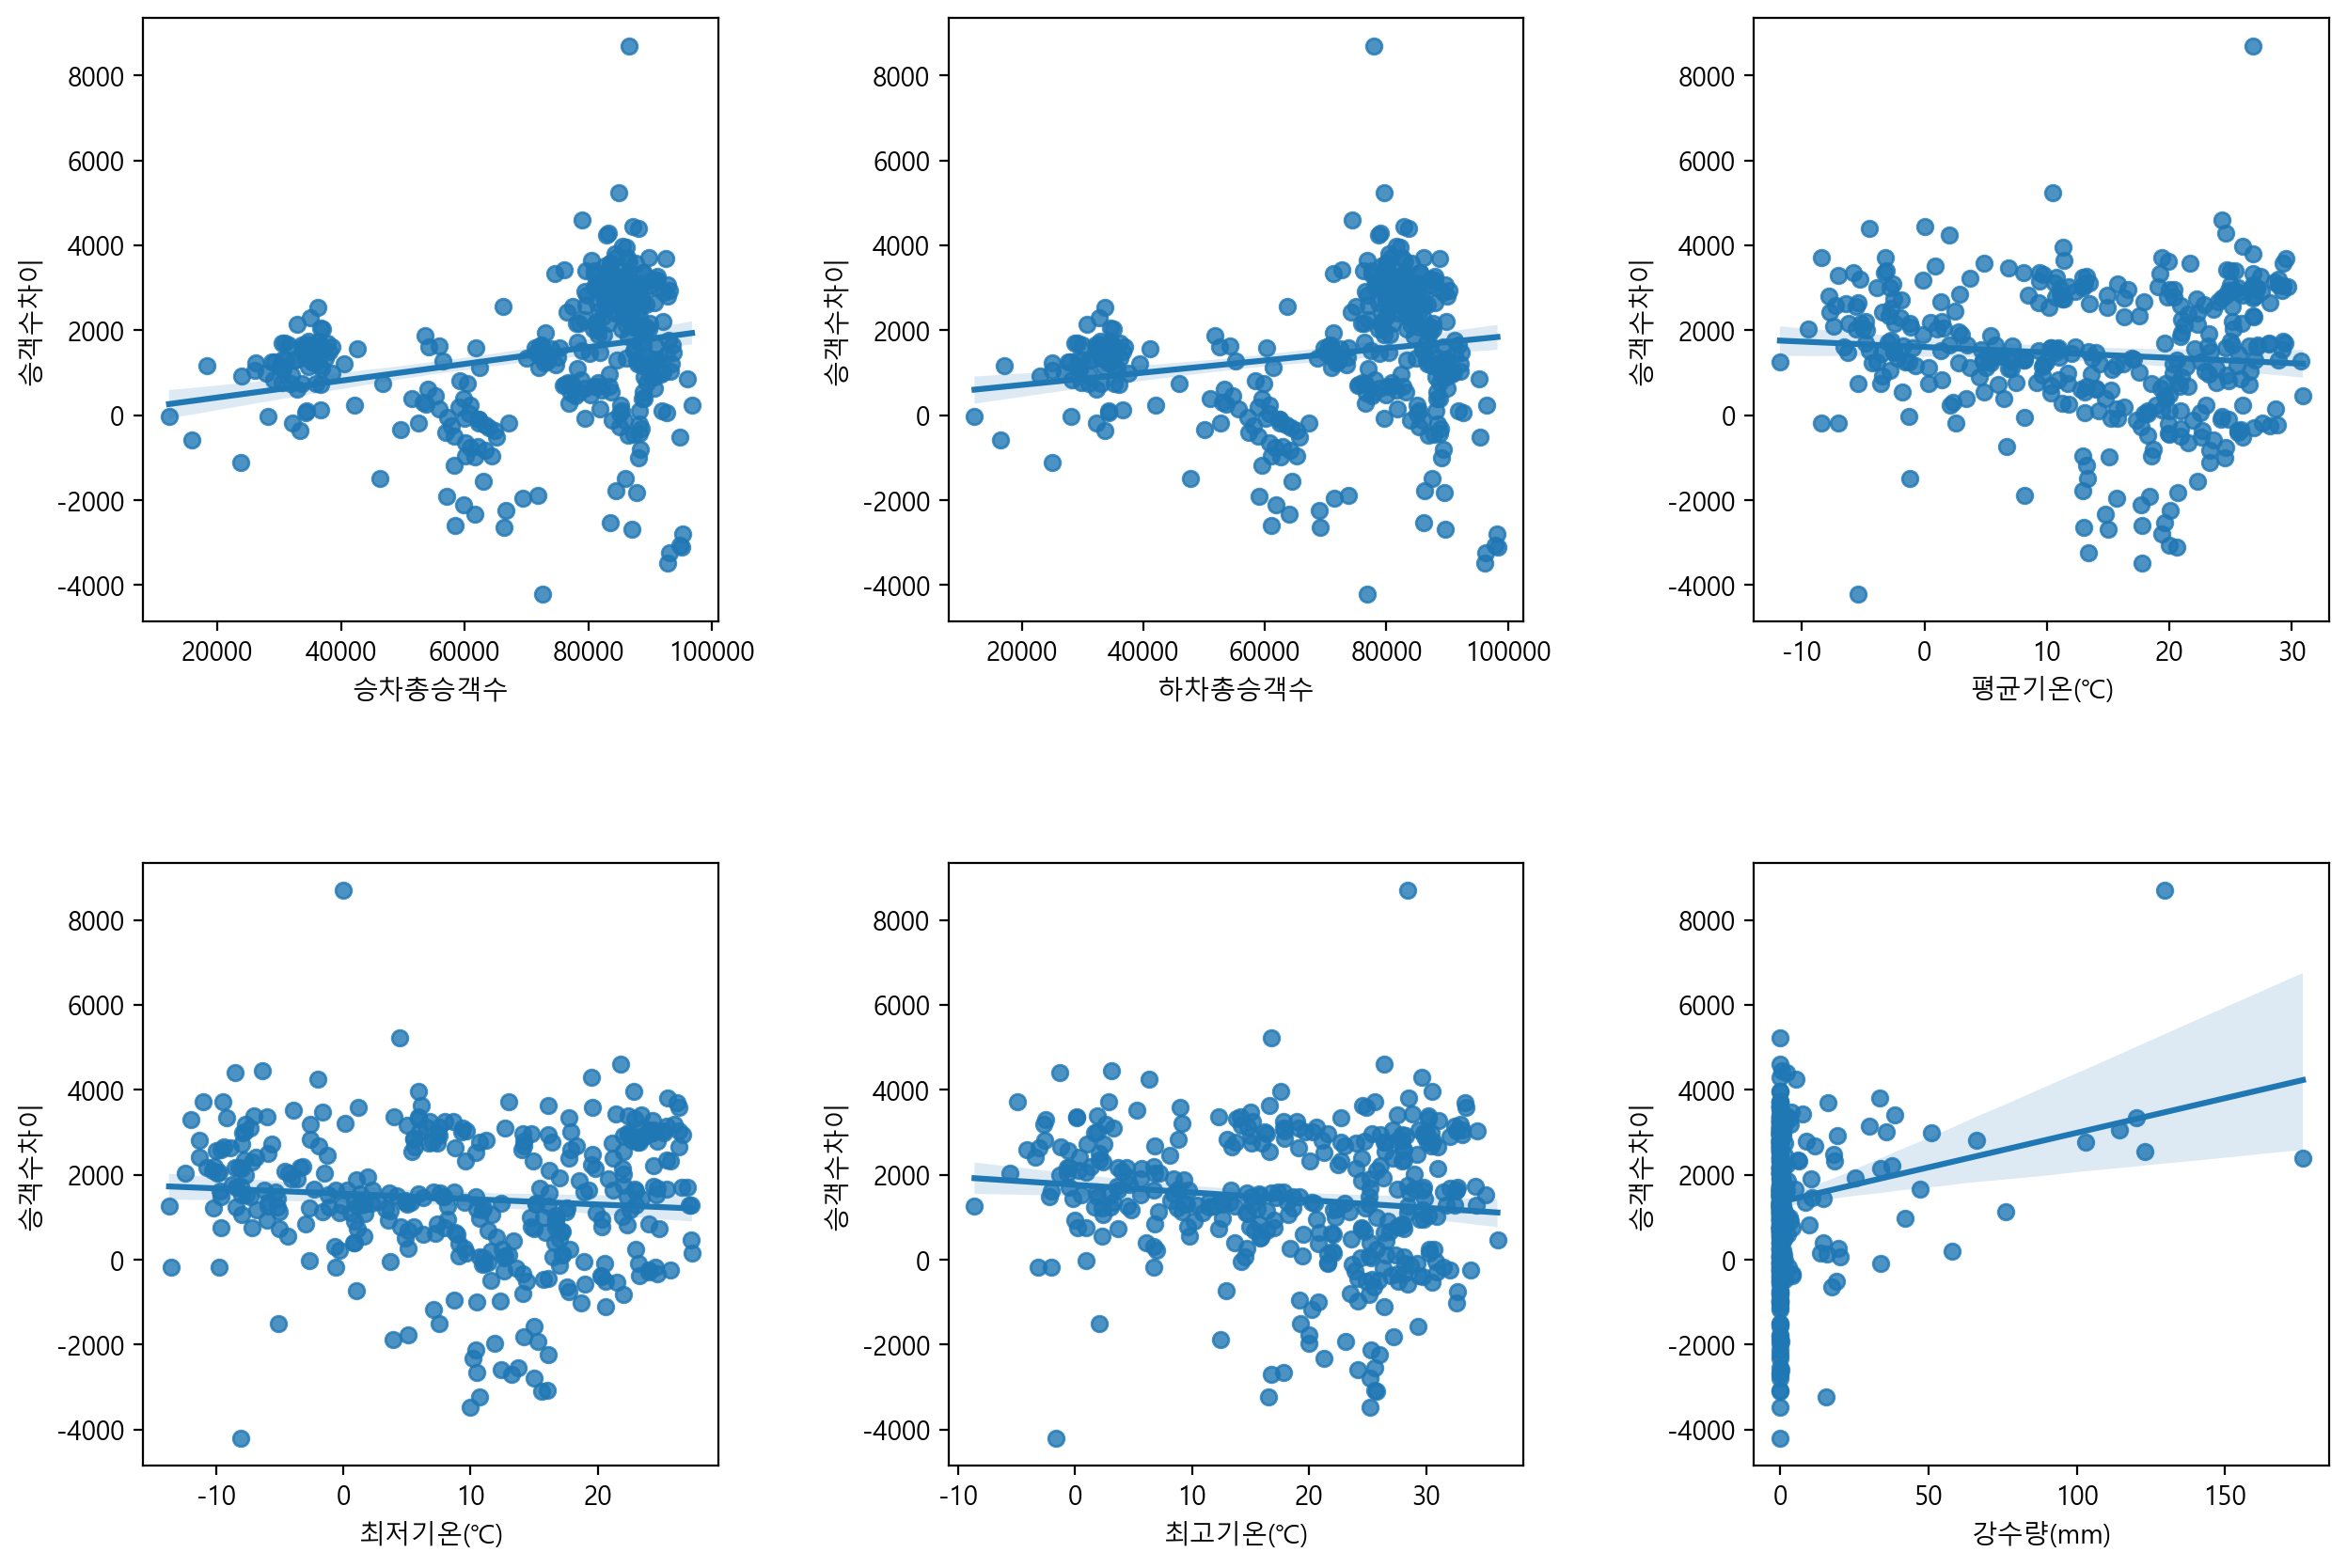

In [52]:
plt.figure(figsize = (15, 10))

for index, col_names in enumerate(gn_2.columns[8:-1]):
    ax1 = plt.subplot(2, 3, index +1)
    sns.regplot(x=col_names,
                y = gn_2.columns[-1],
                data = gn_2,
                ax = ax1)
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()

#### 승차총승객수와 다른 변수와의 관련성
- 하차총승객수, 승객수 차이 (+)

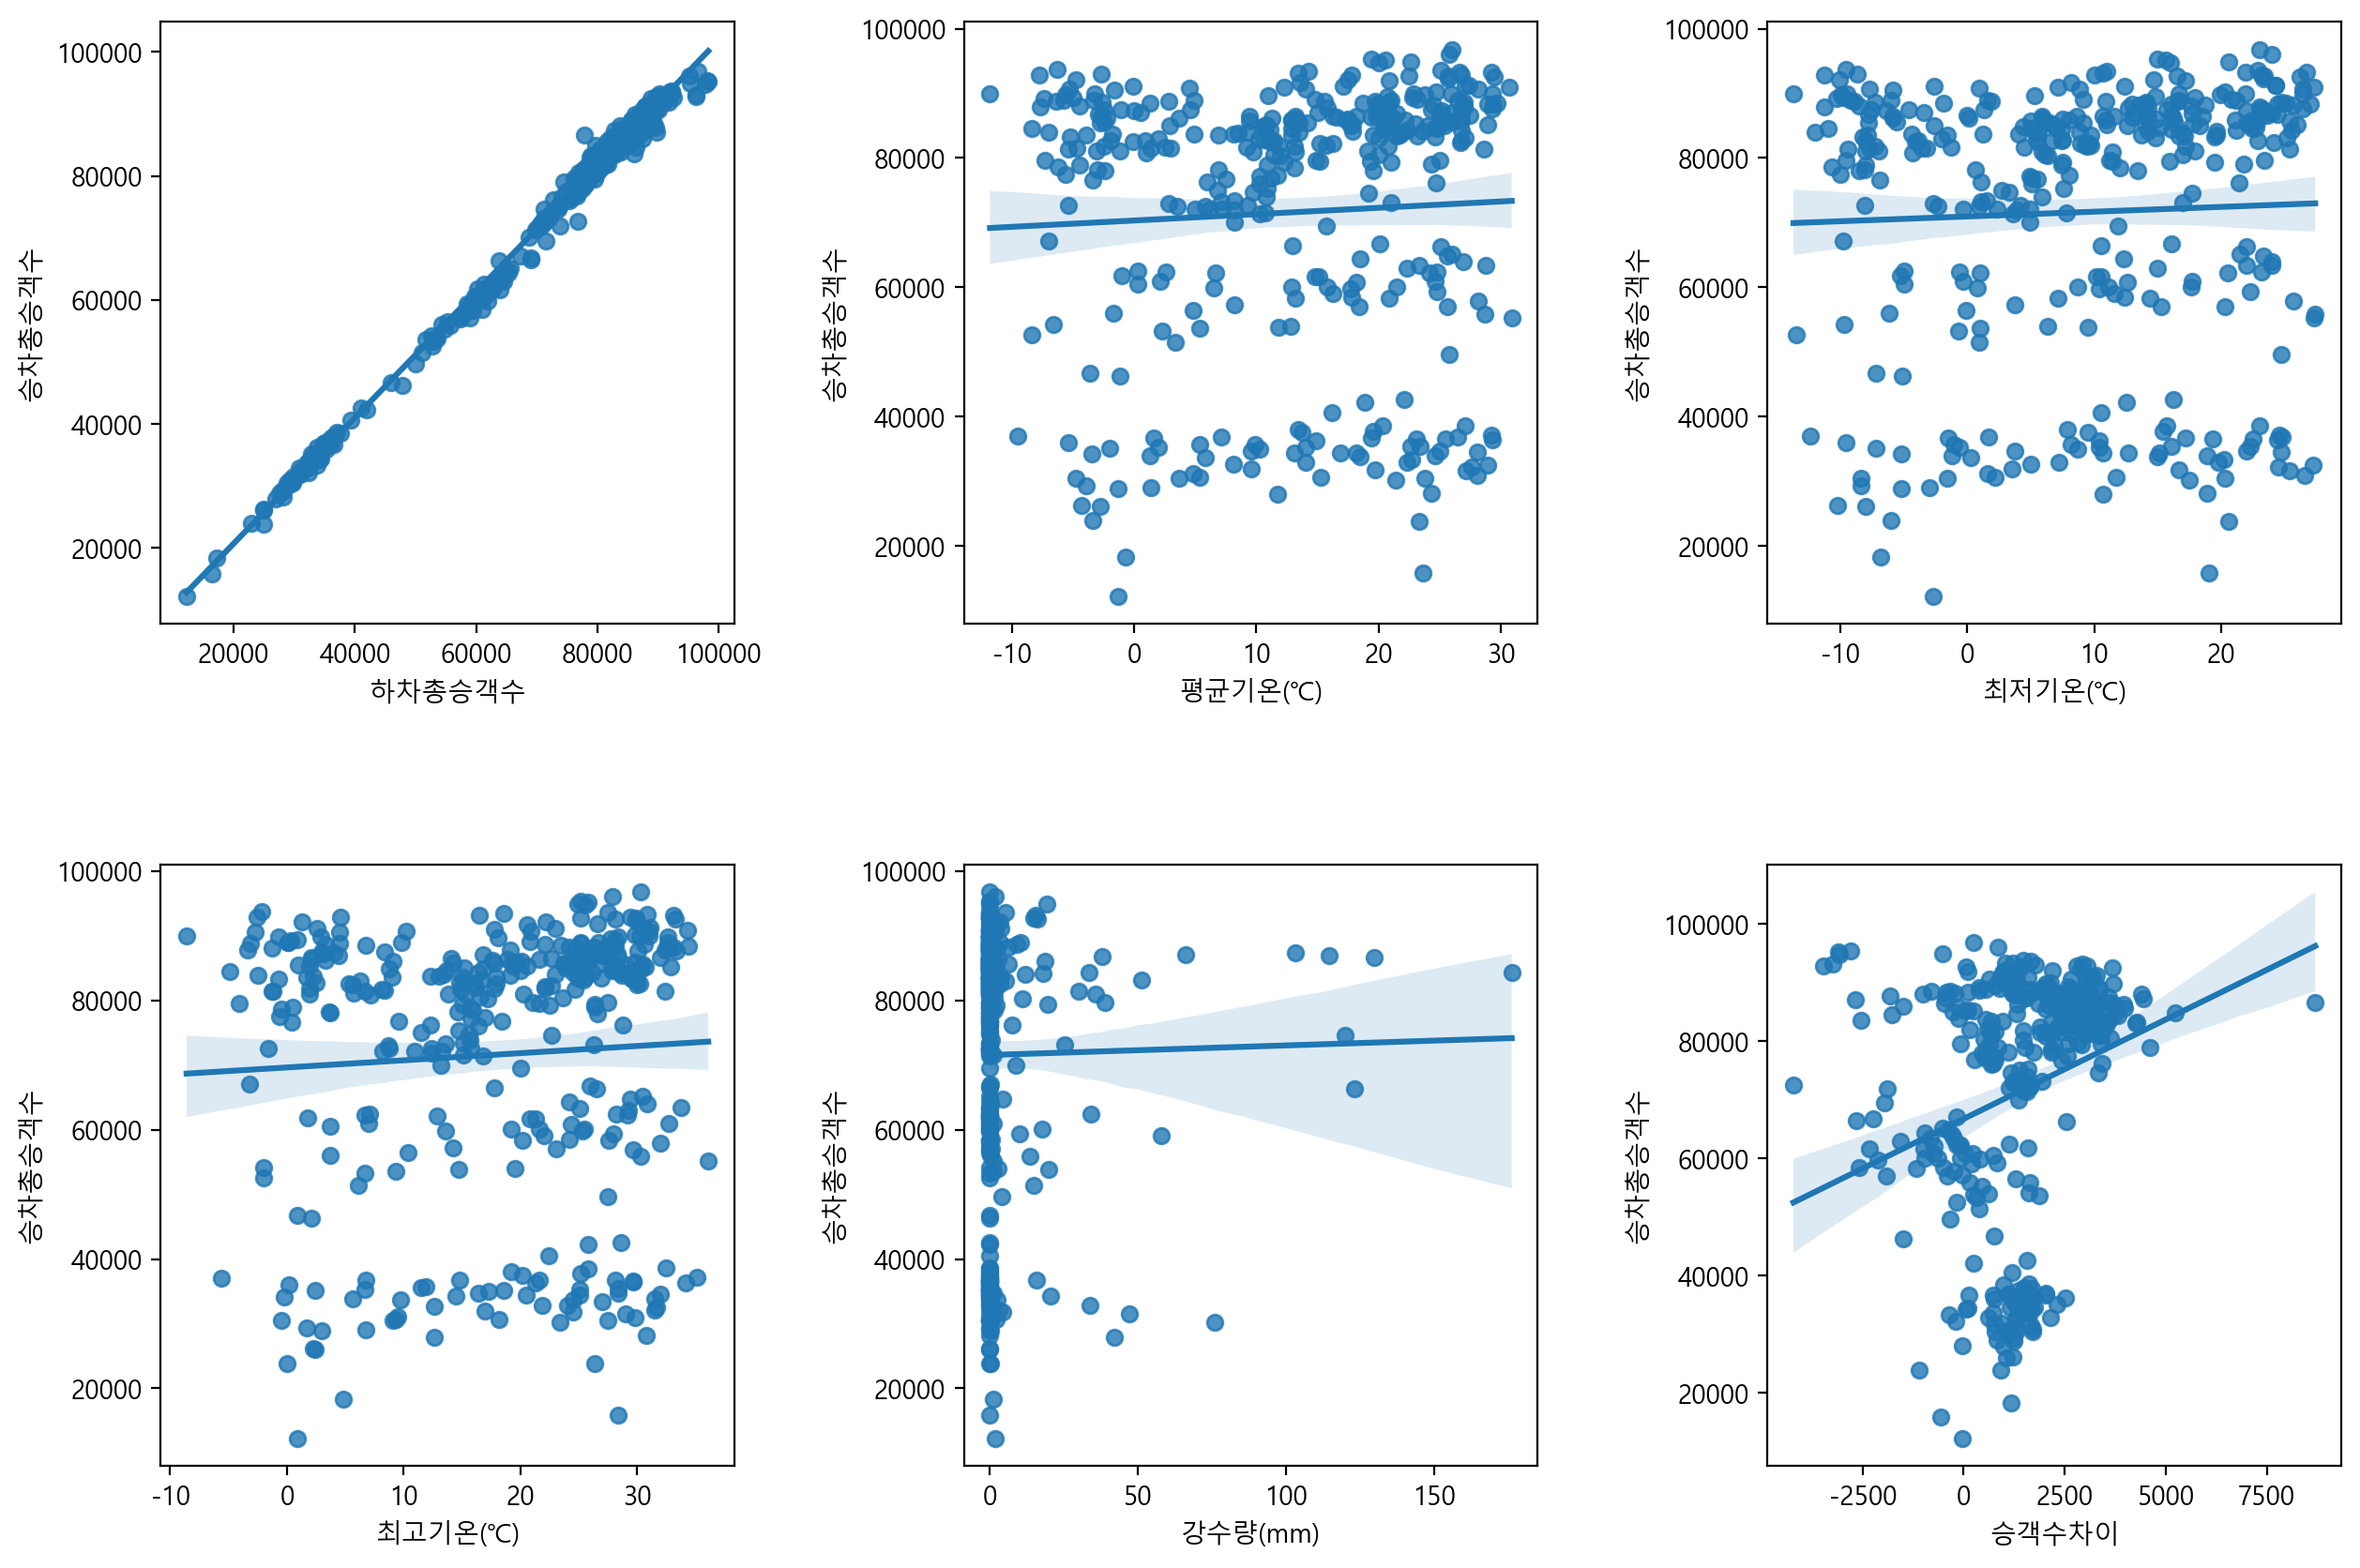

In [53]:
plt.figure(figsize = (15, 10))

for index, col_names in enumerate(gn_2.columns[9:]):
    ax1 = plt.subplot(2, 3, index +1)
    sns.regplot(x=col_names,
                y = gn_2.columns[8],
                data = gn_2,
                ax = ax1)
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()

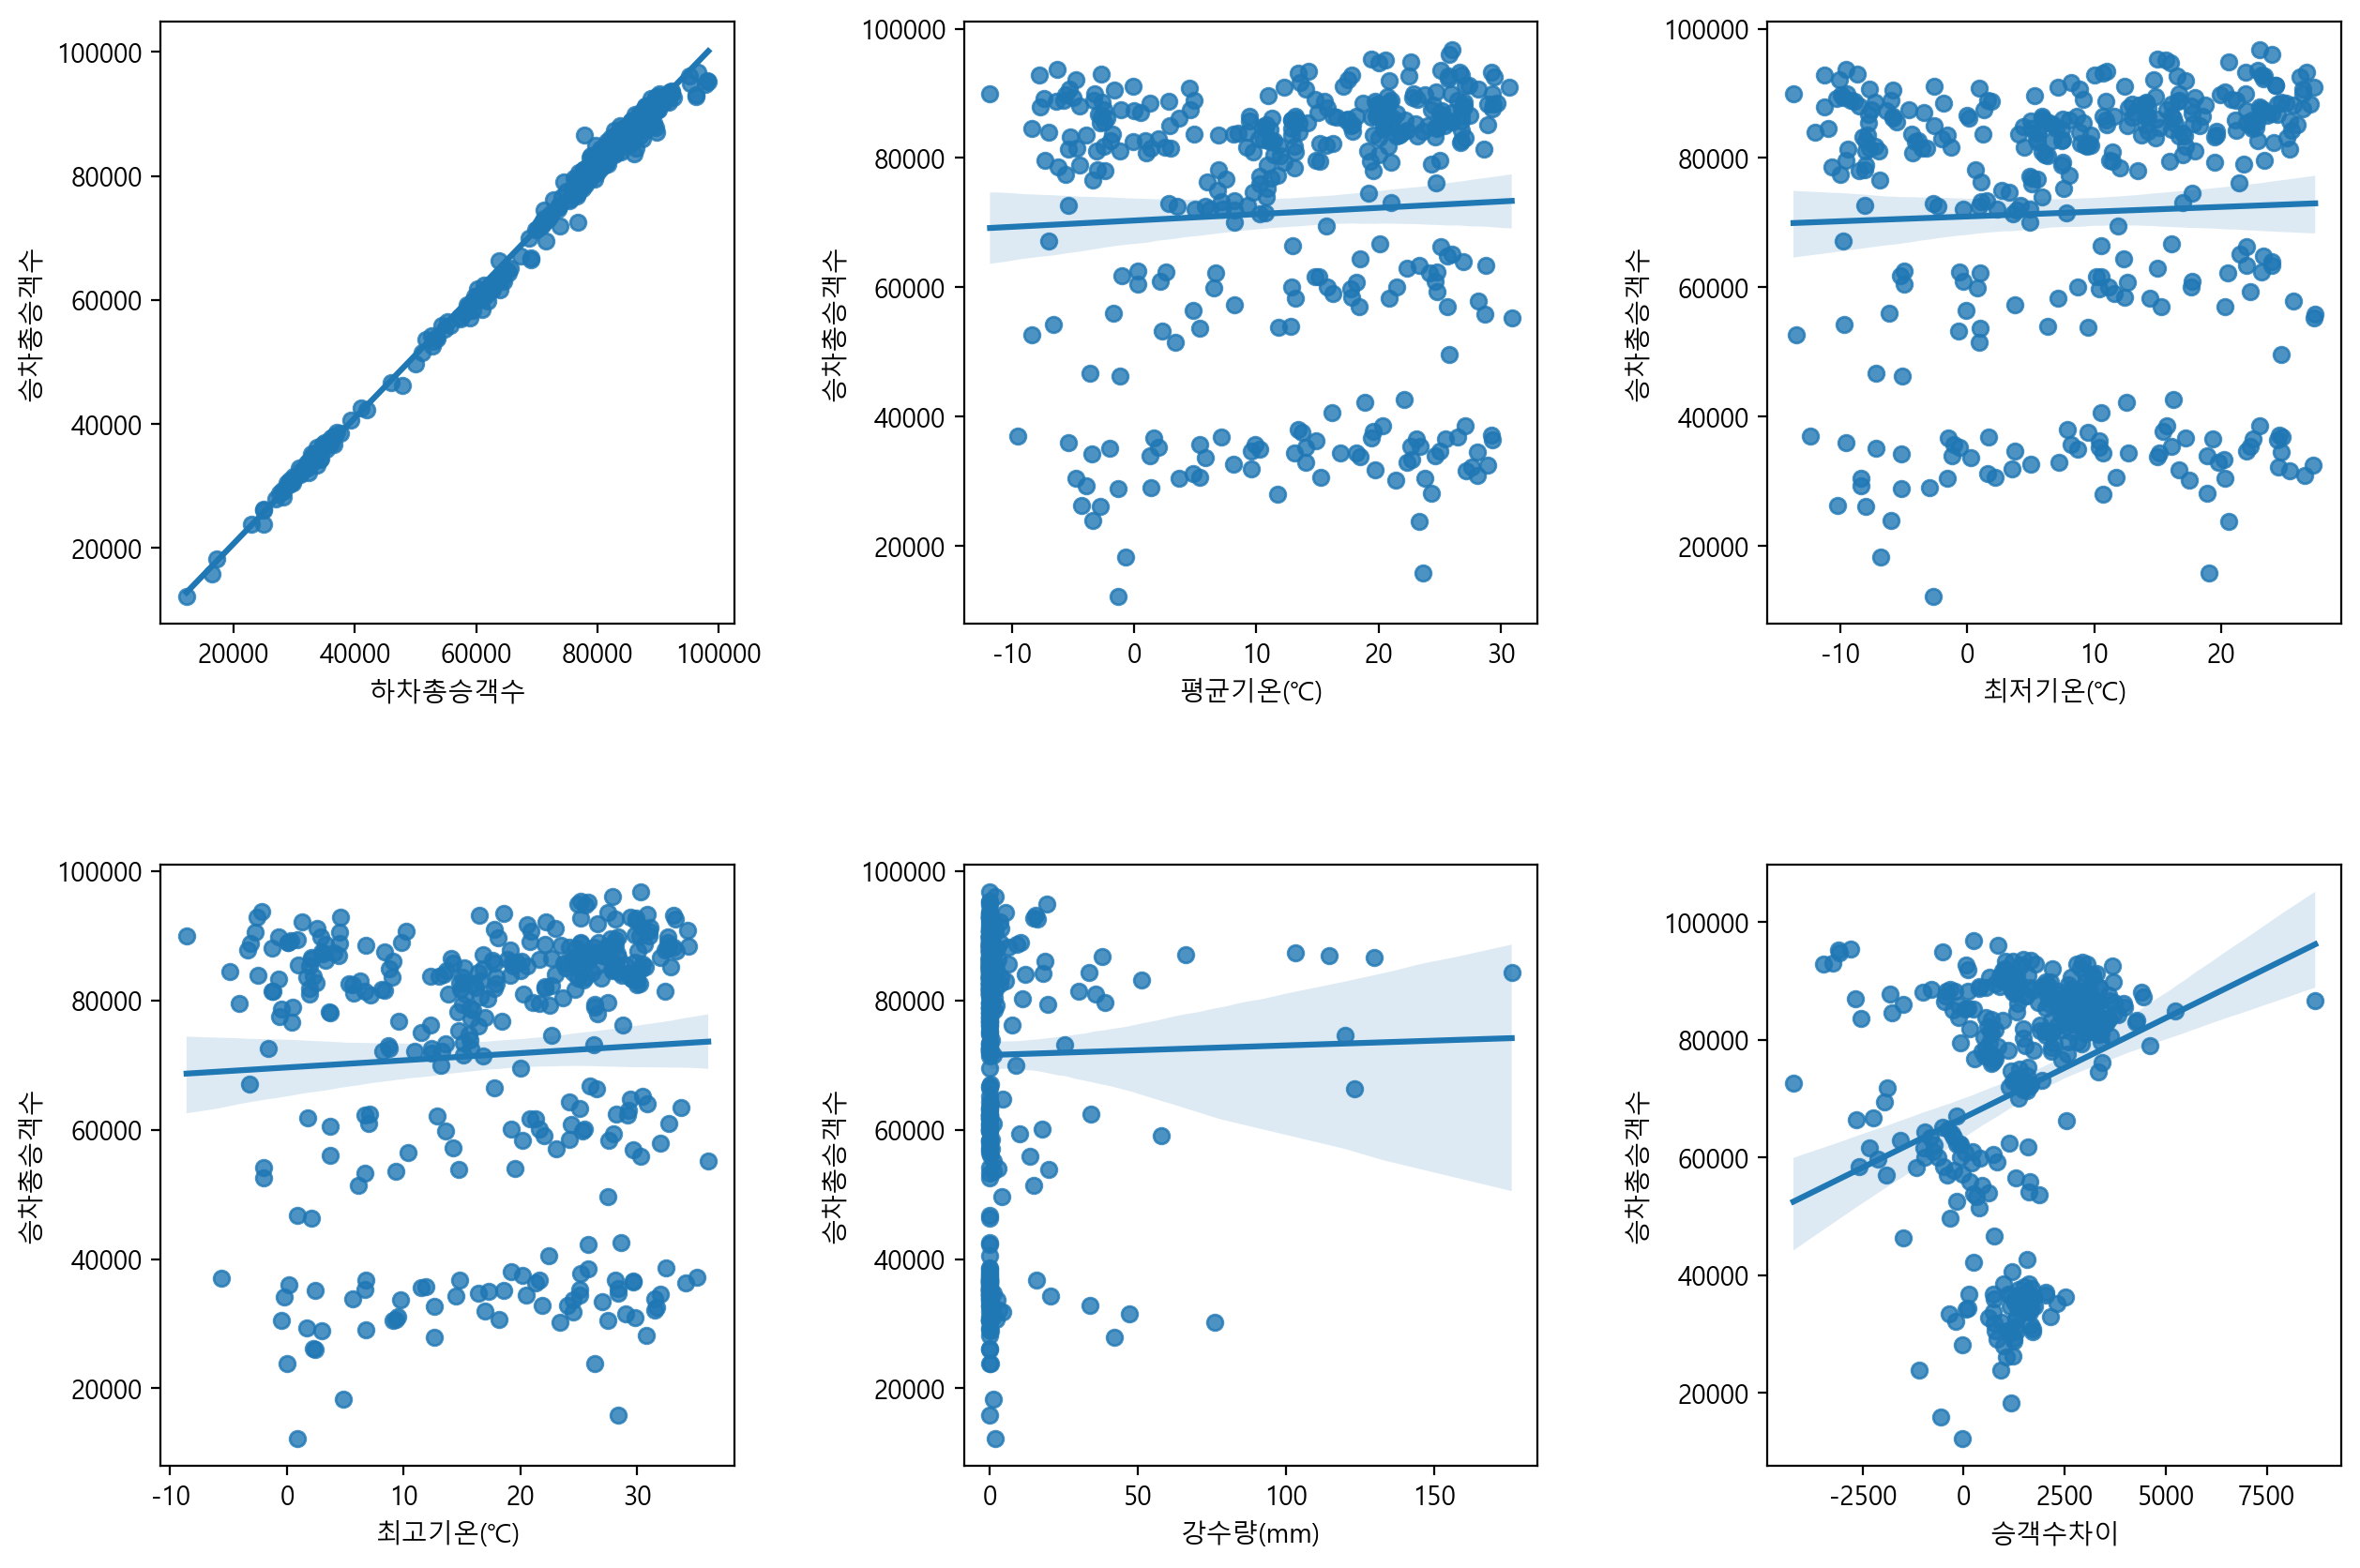

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))

for index, col_names in enumerate(gn_2.columns[9:]):
    ax1 = plt.subplot(2, 3, index + 1)
    sns.regplot(x=col_names,
                y=gn_2.columns[8],
                data=gn_2,
                ax=ax1)

# 여백 조정
plt.subplots_adjust(wspace=0.4, hspace=0.4)

plt.show()

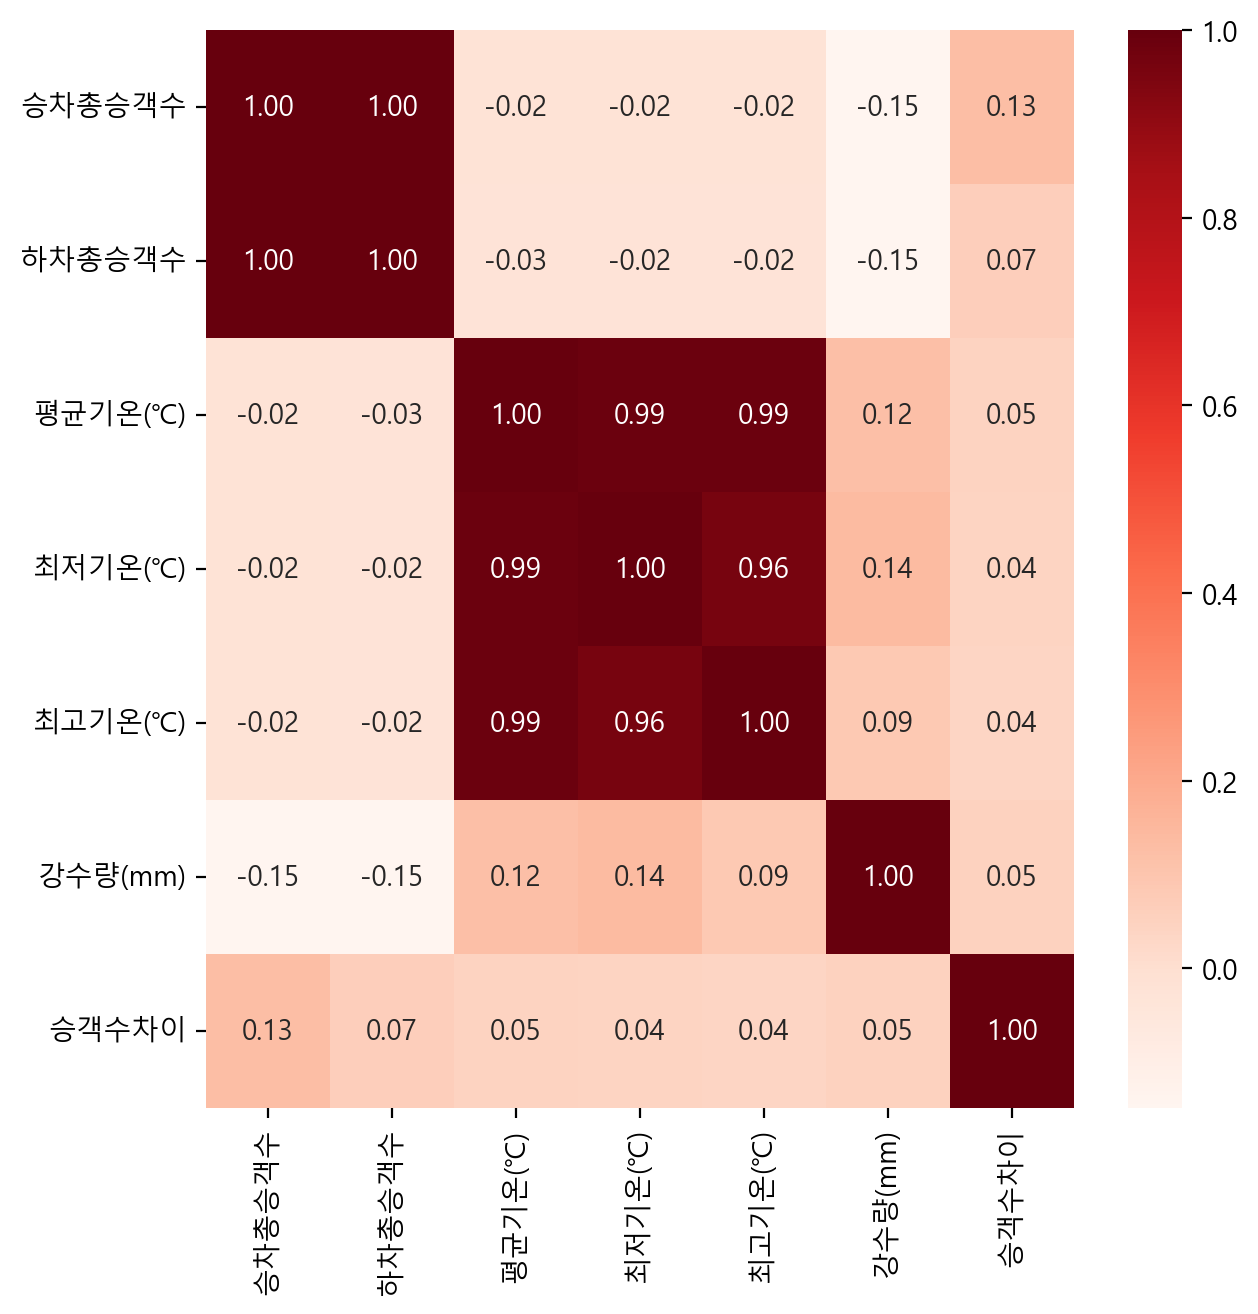

In [31]:
plt.figure(figsize = (7, 7))
sns.heatmap(gn_2.loc[:,'승차총승객수':].corr(),
            annot = True,
            cmap = 'Reds',
            fmt = '.2f')
plt.show()

#### 체감온도
- 체감온도 데이터는 기상청의 의도에 따라 결측치가 존재하므로 따로 처리를 해본다.

In [32]:
Wind = 

SyntaxError: invalid syntax (18804971.py, line 1)